In [44]:
# import the necessary packages
# for testing models from scratch
from sklearn.datasets import make_blobs # create 'blobs' of normally distributed data points
import matplotlib.pyplot as plt
import numpy as np
import argparse

Implement gradient descent

In [45]:
def sigmoid_activation(x):
	# compute and return the sigmoid activation value for a
	# given input value. Will be an S shaped-curve aka
	# 'activation function', b/c the function will activate and fire
	# ON output > 0.5 or OFF output <= 0.5 (.5 is a set threshold)
	return 1.0 / (1 + np.exp(-x))

In [46]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"epochs": 100,
	"alpha": 0.01
}

In [47]:
# generate a 2-class classification problem with 250 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=250, n_features=2, centers=2,
	cluster_std=1.05, random_state=20)

# insert a column of 1's as the first entry in the feature
# vector -- this is a little trick that allows us to treat
# the bias as a trainable parameter *within* the weight matrix
# rather than an entirely separate variable
X = np.c_[np.ones((X.shape[0])), X]

# initialize our weight matrix such it has the same number of
# columns as our input features
print("[INFO] starting training...")
W = np.random.uniform(size=(X.shape[1],))

# initialize a list to store the loss value for each epoch
lossHistory = []

[INFO] starting training...


In [48]:
# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
	# take the dot product between our features `X` and the
	# weight matrix `W`, then pass this value through the
	# sigmoid activation function, thereby giving us our
	# predictions on the dataset
	preds = sigmoid_activation(X.dot(W))

	# now that we have our predictions, we need to determine
	# our `error`, which is the difference between our predictions
	# and the true values
	error = preds - y

	# given our `error`, we can compute the total loss value as
	# the sum of squared loss -- ideally, our loss should
	# decrease as we continue training
	loss = np.sum(error ** 2)
	lossHistory.append(loss)
	print("[INFO] epoch #{}, loss={:.7f}".format(epoch + 1, loss))

	# the gradient update is therefore the dot product between
	# the transpose of `X` and our error, scaled by the total
	# number of data points in `X`
	gradient = X.T.dot(error) / X.shape[0]

	# in the update stage, all we need to do is nudge our weight
	# matrix in the opposite direction of the gradient (hence the
	# term "gradient descent" by taking a small step towards a
	# set of "more optimal" parameters
	W += -args["alpha"] * gradient

[INFO] epoch #1, loss=123.3738525
[INFO] epoch #2, loss=122.8110754
[INFO] epoch #3, loss=122.0533584
[INFO] epoch #4, loss=121.0360470
[INFO] epoch #5, loss=119.6763598
[INFO] epoch #6, loss=117.8713025
[INFO] epoch #7, loss=115.4980227
[INFO] epoch #8, loss=112.4190461
[INFO] epoch #9, loss=108.4955648
[INFO] epoch #10, loss=103.6116443
[INFO] epoch #11, loss=97.7094155
[INFO] epoch #12, loss=90.8288888
[INFO] epoch #13, loss=83.1373942
[INFO] epoch #14, loss=74.9291185
[INFO] epoch #15, loss=66.5832623
[INFO] epoch #16, loss=58.4905279
[INFO] epoch #17, loss=50.9774955
[INFO] epoch #18, loss=44.2591301
[INFO] epoch #19, loss=38.4307970
[INFO] epoch #20, loss=33.4901991
[INFO] epoch #21, loss=29.3711987
[INFO] epoch #22, loss=25.9753064
[INFO] epoch #23, loss=23.1945060
[INFO] epoch #24, loss=20.9249839
[INFO] epoch #25, loss=19.0739194
[INFO] epoch #26, loss=17.5618524
[INFO] epoch #27, loss=16.3226012
[INFO] epoch #28, loss=15.3020158
[INFO] epoch #29, loss=14.4563070
[INFO] epoch 

In [49]:
# to demonstrate how to use our weight matrix as a classifier,
# let's look over our a sample of training examples
for i in np.random.choice(250, 10):
	# compute the prediction by taking the dot product of the
	# current feature vector with the weight matrix W, then
	# passing it through the sigmoid activation function
	activation = sigmoid_activation(X[i].dot(W))

	# the sigmoid function is defined over the range y=[0, 1],
	# so we can use 0.5 as our threshold -- if `activation` is
	# below 0.5, it's class `0`; otherwise it's class `1`
	label = 0 if activation < 0.5 else 1

	# show our output classification
	print("activation={:.4f}; predicted_label={}, true_label={}".format(
		activation, label, y[i]))

activation=0.9594; predicted_label=1, true_label=1
activation=0.9266; predicted_label=1, true_label=1
activation=0.8812; predicted_label=1, true_label=1
activation=0.0759; predicted_label=0, true_label=0
activation=0.1569; predicted_label=0, true_label=0
activation=0.1279; predicted_label=0, true_label=0
activation=0.8153; predicted_label=1, true_label=1
activation=0.2161; predicted_label=0, true_label=0
activation=0.9721; predicted_label=1, true_label=1
activation=0.1221; predicted_label=0, true_label=0


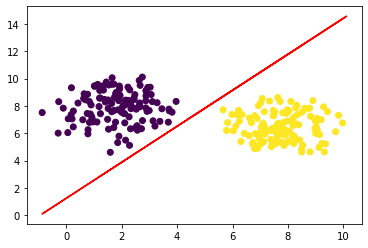

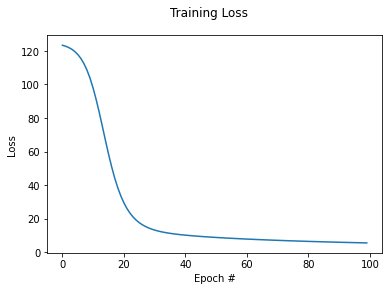

In [50]:
# compute the line of best fit by setting the sigmoid function
# to 0 and solving for X2 in terms of X1
Y = (-W[0] - (W[1] * X)) / W[2]

# plot the original data along with our line of best fit
plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")

# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, args["epochs"]), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()